In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [68]:
df = pd.read_csv("data/6_001.csv")

In [69]:
df = pd.read_csv("data/6_001.csv")
df = df[['glucose', 'datetime', 'simple_sugars']].dropna()
food_data = pd.read_csv("diabetes_subset_pictures-glucose-food-insulin/001/food.csv")
food_data[['datetime', 'description']]
# Initialize the scaler
scaler = MinMaxScaler()

# Apply standard scaling to glucose and simple_sugars
df[['glucose', 'simple_sugars']] = scaler.fit_transform(df[['glucose', 'simple_sugars']])

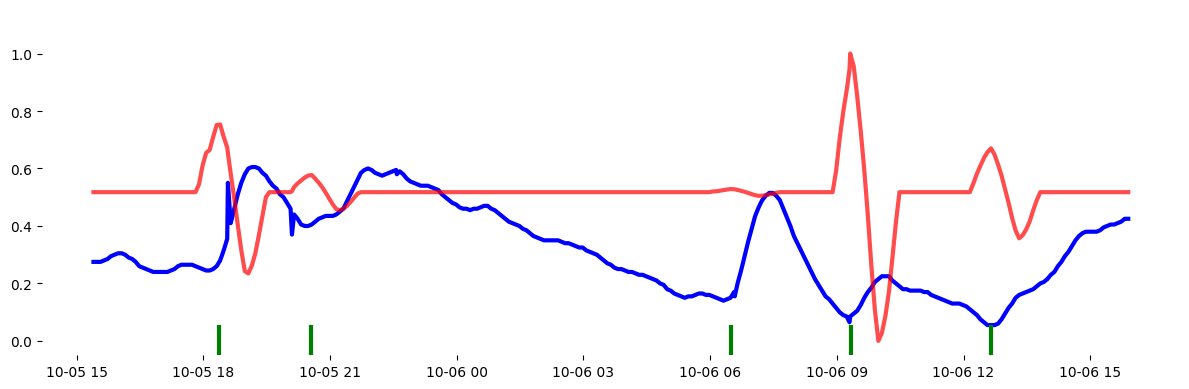

In [70]:
# Convert datetime to datetime type for both dataframes
df['datetime'] = pd.to_datetime(df['datetime'])
food_data['datetime'] = pd.to_datetime(food_data['datetime'], format='%Y:%m:%d %H:%M:%S')

df_limited = df.tail(300)
plt.figure(figsize=(12, 4))
plt.plot(df_limited['datetime'], df_limited['glucose'], 'b-', linewidth=3, label='Glucose')
plt.plot(df_limited['datetime'], df_limited['simple_sugars'], 'r-', linewidth=3, alpha=0.7, label='Simple Sugars')
plt.gca().xaxis_date()
plt.subplots_adjust(bottom=0.2)
y_min, y_max = plt.ylim()
plt.ylim(y_min, y_max*1.1)
start_time = df_limited['datetime'].min()
end_time = df_limited['datetime'].max()
indicator_height = 10
bottom_position = y_min - 9.9

for _, meal in food_data[
    (food_data['datetime'] >= start_time) & 
    (food_data['datetime'] <= end_time)
].iterrows():
    meal_time = meal['datetime']
    # Draw a small vertical line just below the graph
    plt.plot([meal_time, meal_time], [bottom_position, bottom_position + indicator_height], 
             'g-', linewidth=3, alpha=1)

# Clean up the plot
plt.tight_layout()

# Remove frame/borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig('graphical_abstract/glucose_simple_sugars_plot.png')
plt.show()

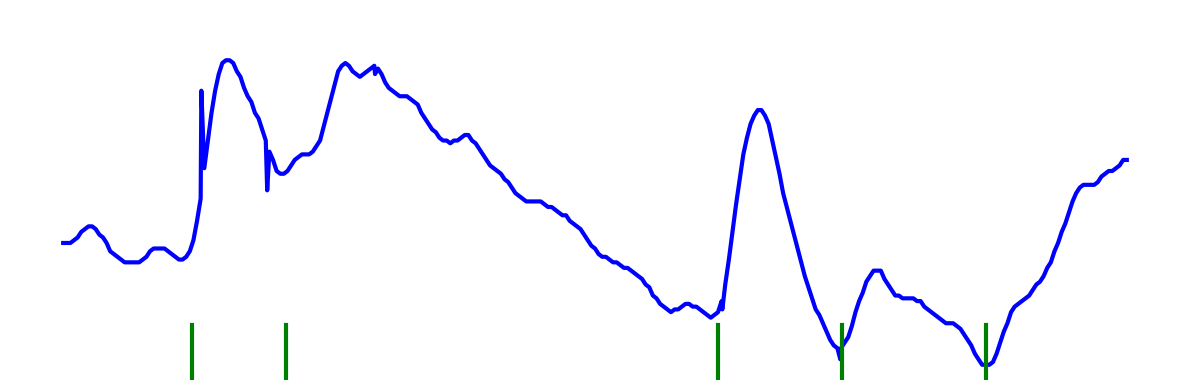

In [71]:
# Convert datetime to datetime type for both dataframes
df['datetime'] = pd.to_datetime(df['datetime'])
food_data['datetime'] = pd.to_datetime(food_data['datetime'], format='%Y:%m:%d %H:%M:%S')

# Limit to first 100 entries
df_limited = df.tail(300)

# Create a figure
plt.figure(figsize=(12, 4))

# Plot glucose values (limited to first 100 entries)
plt.plot(df_limited['datetime'], df_limited['glucose'], 'b-', linewidth=3, label='Glucose')


# Format x-axis to handle dates properly
plt.gca().xaxis_date()

# Adjust plot to leave room at bottom for meal indicators
plt.subplots_adjust(bottom=0.2)

# Get current y-axis limits
y_min, y_max = plt.ylim()

# Set new y-axis limits to leave space below
plt.ylim(y_min, y_max*1.1)

# Get time range of limited data for filtering meal indicators
start_time = df_limited['datetime'].min()
end_time = df_limited['datetime'].max()

# Add meal indicators below the graph (only for meals within the time range)
indicator_height = 10
bottom_position = y_min - 9.9

for _, meal in food_data[
    (food_data['datetime'] >= start_time) & 
    (food_data['datetime'] <= end_time)
].iterrows():
    meal_time = meal['datetime']
    # Draw a small vertical line just below the graph
    plt.plot([meal_time, meal_time], [bottom_position, bottom_position + indicator_height], 
             'g-', linewidth=3, alpha=1)

# Clean up the plot
plt.xticks([])
plt.yticks([])
plt.tight_layout()

# Remove frame/borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig('graphical_abstract/glucose_plot.png')
plt.show()

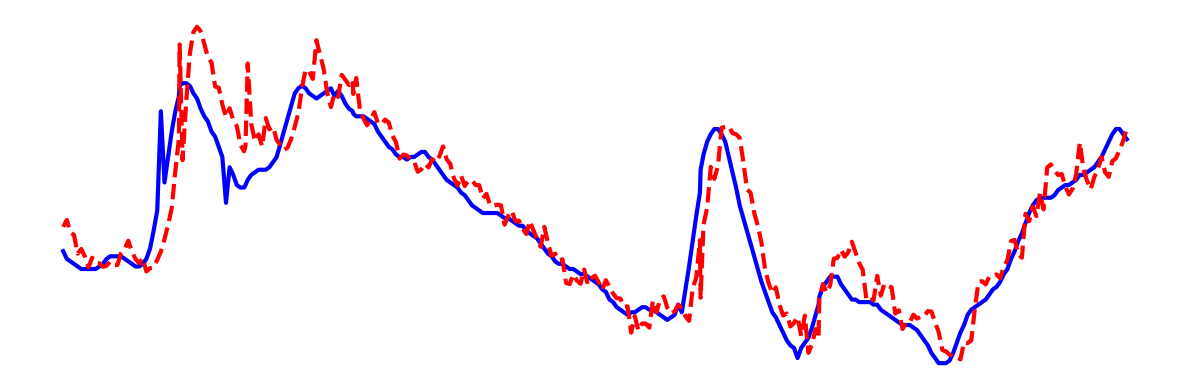

In [28]:

# Load the predictions data
predictions_df = pd.read_csv("predictions/pixtral-large-latest/6/001_predictions.csv")
predictions_df = predictions_df.tail(300)
# Convert datetime column to datetime format
predictions_df['Datetime'] = pd.to_datetime(predictions_df['Datetime'])

# Create a figure with a suitable size
plt.figure(figsize=(12, 4))

# Plot predictions and ground truth
plt.plot(predictions_df['Datetime'], predictions_df['Ground_truth'], 'b-', 
         linewidth=3)
plt.plot(predictions_df['Datetime'], predictions_df['Predictions'], 'r--', 
         linewidth=3)

plt.xticks([])
plt.yticks([])
# Format x-axis to handle dates properly
plt.gca().xaxis_date()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('graphical_abstract/predictions_plot.png')
plt.show()

In [151]:
predictions_df

,Predictions,Ground_truth,Datetime
0,278.945880,279.28210,2014-10-04 00:04:01
1,270.489414,277.48028,2014-10-04 00:09:01
2,277.991234,273.87664,2014-10-04 00:14:01
3,261.625068,270.27300,2014-10-04 00:19:01
4,268.339172,268.47118,2014-10-04 00:24:01
...,...,...,...
782,205.218306,221.62386,2014-10-06 16:04:02
783,210.373104,225.22750,2014-10-06 16:09:02
784,215.771609,225.22750,2014-10-06 16:14:02
785,226.844234,221.62386,2014-10-06 16:19:02
